# Indicators

In this notebook we collect important economic indicators.

## Preparation

In [1]:
from usefulFunctions import BLS

Functions uploaded: readJSONfile, inflation, BLS


In [2]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Retreiving the BLS API key
%run "APIkeys.py"
BLSkey = os.environ['BLS_API_key']

API keys loaded now


In [4]:
# You can check the Python version you have installed on your computer. Uncomment the following two lines and run this cell.

# import sys
# print(sys.version)

BLS data can be found [here](https://www.bls.gov/help/hlpforma.htm).

## CPI-U

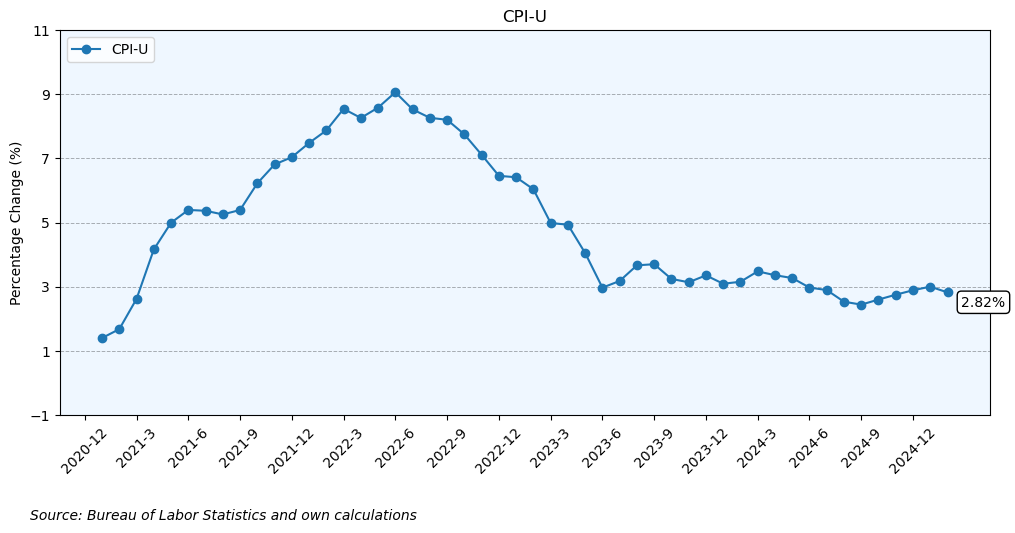

In [5]:
BLS(BLSkey,display=True)

## Energy data

In this section we use data from the [US Energy Administration](https://www.eia.gov/).

To get an API key, go [here](https://www.eia.gov/opendata/documentation.php). Add the key you get by e-mail to APIkeys.py using 

```Python
os.environ["EIA_API_key"] = "<paste the key here>"
```

In [6]:
EIAkey=os.environ['EIA_API_key']

### Energy use

In [7]:
EIAurl = 'https://api.eia.gov/v2/seriesid/ELEC.SALES.US-RES.A?api_key='+EIAkey+'&frequency=monthly'

In [8]:
#EIAurl

In [9]:
r=requests.get(EIAurl).json()

In [10]:
EIA_df_KWh = pd.DataFrame(r['response']['data'])

In [11]:
EIA_df_KWh.head()

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
0,2024,US,U.S. Total,RES,residential,1.489607e+06,million kilowatt hours
1,2023,US,U.S. Total,RES,residential,1.450025e+06,million kilowatt hours
2,2022,US,U.S. Total,RES,residential,1.509233e+06,million kilowatt hours
3,2021,US,U.S. Total,RES,residential,1.470487e+06,million kilowatt hours
4,2020,US,U.S. Total,RES,residential,1.464605e+06,million kilowatt hours


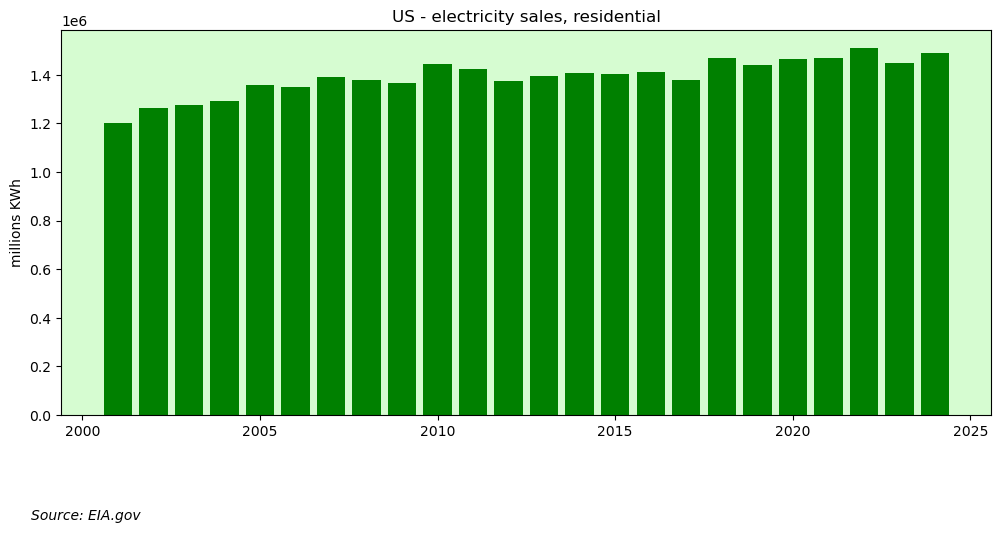

In [12]:
plt.figure(figsize=(12, 5))
plt.bar(EIA_df_KWh['period'],EIA_df_KWh['sales'],color="green")
plt.gca().set_facecolor((0.2, 0.95, 0.1, 0.2))
plt.ylabel("millions KWh")
plt.title("US - electricity sales, residential")
plt.figtext(0.1, -0.1, "Source: EIA.gov", ha='left', fontsize=10, style='italic')
plt.show()

### Prices

In [13]:
EIAurl2 ='https://api.eia.gov/v2/electricity/retail-sales/data?api_key='+EIAkey+'&data[]=price&facets[sectorid][]=RES&facets[stateid][]=PA&frequency=monthly&start=2020-01-31'
#note: look at the documentation

In [14]:
r=requests.get(EIAurl2).json()

In [15]:
r['response']['data']

[{'period': '2020-07',
  'stateid': 'PA',
  'stateDescription': 'Pennsylvania',
  'sectorid': 'RES',
  'sectorName': 'residential',
  'price': '13.32',
  'price-units': 'cents per kilowatt-hour'},
 {'period': '2022-08',
  'stateid': 'PA',
  'stateDescription': 'Pennsylvania',
  'sectorid': 'RES',
  'sectorName': 'residential',
  'price': '16.34',
  'price-units': 'cents per kilowatt-hour'},
 {'period': '2023-01',
  'stateid': 'PA',
  'stateDescription': 'Pennsylvania',
  'sectorid': 'RES',
  'sectorName': 'residential',
  'price': '18.02',
  'price-units': 'cents per kilowatt-hour'},
 {'period': '2023-03',
  'stateid': 'PA',
  'stateDescription': 'Pennsylvania',
  'sectorid': 'RES',
  'sectorName': 'residential',
  'price': '18.13',
  'price-units': 'cents per kilowatt-hour'},
 {'period': '2022-01',
  'stateid': 'PA',
  'stateDescription': 'Pennsylvania',
  'sectorid': 'RES',
  'sectorName': 'residential',
  'price': '14.09',
  'price-units': 'cents per kilowatt-hour'},
 {'period': '20

In [16]:
EIA_df_price = pd.DataFrame(r['response']['data'])

In [17]:
EIA_df_price.head()

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2020-07,PA,Pennsylvania,RES,residential,13.32,cents per kilowatt-hour
1,2022-08,PA,Pennsylvania,RES,residential,16.34,cents per kilowatt-hour
2,2023-01,PA,Pennsylvania,RES,residential,18.02,cents per kilowatt-hour
3,2023-03,PA,Pennsylvania,RES,residential,18.13,cents per kilowatt-hour
4,2022-01,PA,Pennsylvania,RES,residential,14.09,cents per kilowatt-hour


In [21]:
# Sorting a DataFrame

EIA_df_price.sort_values(by='period', ascending=True, inplace=True)

In [19]:
EIA_df_price.head()

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
30,2020-01,PA,Pennsylvania,RES,residential,13.65,cents per kilowatt-hour
59,2020-02,PA,Pennsylvania,RES,residential,13.72,cents per kilowatt-hour
27,2020-03,PA,Pennsylvania,RES,residential,13.77,cents per kilowatt-hour
16,2020-04,PA,Pennsylvania,RES,residential,13.78,cents per kilowatt-hour
17,2020-05,PA,Pennsylvania,RES,residential,14.01,cents per kilowatt-hour


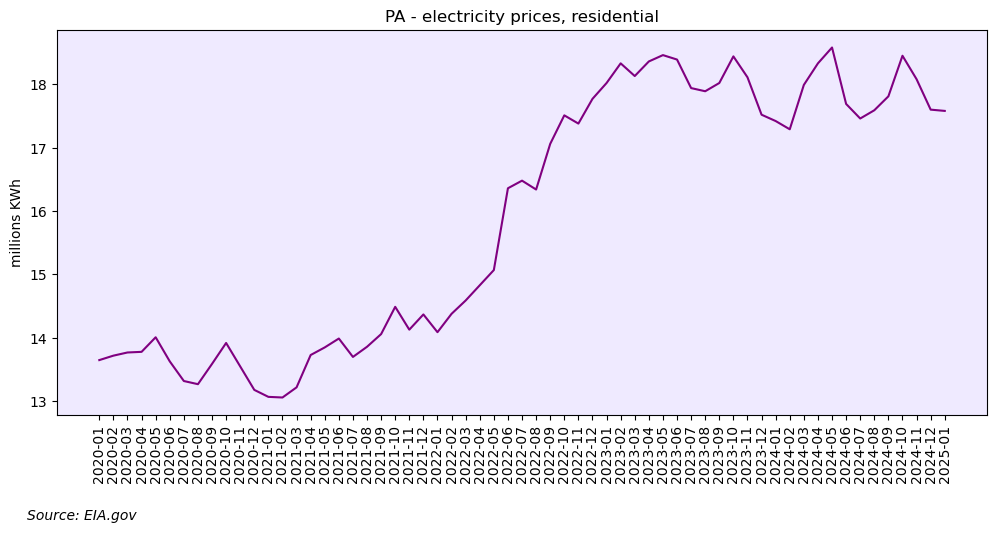

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(EIA_df_price['period'],EIA_df_price['price'].astype(float),color="purple")
plt.gca().set_facecolor((0.7, 0.6, 1, 0.2))
plt.ylabel("millions KWh")
plt.title("PA - electricity prices, residential")
plt.xticks(rotation=90)
plt.figtext(0.1, -0.1, "Source: EIA.gov", ha='left', fontsize=10, style='italic')
plt.show()